In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistic

## Data Preparation

In [273]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [274]:
df.shape

(2240, 29)

In [275]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

### Replace Missing Value

In [276]:
mean_income = df['Income'].mean()
mean_income

52247.25135379061

In [277]:
df["Income"] = df["Income"].replace(np.nan, mean_income)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [278]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [279]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [280]:
df.select_dtypes('object').describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Visualization

### Histogram

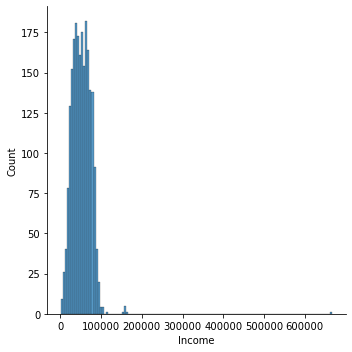

In [282]:
sns.displot(df['Income'])

### Barchart

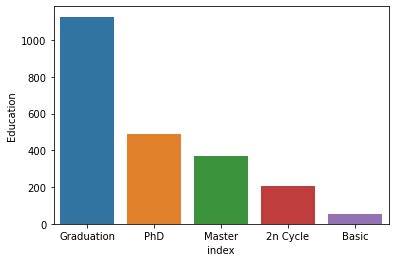

In [283]:
count_education = df['Education'].value_counts().reset_index()

sns.barplot(x=count_education['index'],y=count_education['Education'])
plt.show()

### Boxplot

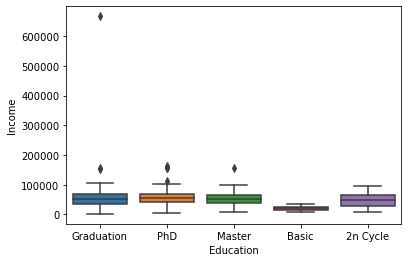

In [284]:
sns.boxplot(x=df['Education'] ,y=df['Income'])
plt.show()

## Measure of Tendency

In [285]:
income_mean = df['Income'].mean()
income_median = df['Income'].median()
income_mode = df['Income'].mode()[0]

print('Mean:',income_mean)
print('Median:',income_median)
print('Mode:',income_mode)

Mean: 52247.25135379059
Median: 51741.5
Mode: 52247.25135379061


## Measure of Spread

In [286]:
income_var = df['Income'].var()
income_sd = df['Income'].std()
income_sd_sqrt = np.sqrt(df['Income'].var())

print('Variance:',income_var)
print('Standard Deviation:',income_sd)
print('Standard Deviation (Variance Square Root):',income_sd_sqrt)

Variance: 626891287.0455546
Standard Deviation: 25037.797168392324
Standard Deviation (Variance Square Root): 25037.797168392324


### Covariance

In [287]:
df.cov().head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.054082e+07,1.074820,1.059687e+06,4.204992,-4.561071,-4374.721821,-2.500181e+04,594.010184,-3.251689e+03,-4340.921889,...,-58.664722,-30.400648,-21.654618,-6.340800,-17.214834,-5.622061,10.603682,0.0,0.0,-25.410174
Year_Birth,1.074820e+00,143.617921,-4.829137e+04,1.485139,-2.297803,-6.897017,-6.364238e+02,-8.540209,-8.350949e+01,-27.251197,...,3.522861,0.192342,-0.190518,0.022177,-0.017434,-0.009010,-0.034802,0.0,0.0,0.091050
Income,1.059687e+06,-48291.373810,6.268913e+08,-5731.501150,259.293204,-2861.828065,4.860982e+06,426963.088737,3.265400e+06,598403.075407,...,-33406.127158,-105.172385,1202.421071,2178.250684,1688.612464,251.999759,-65.700884,0.0,0.0,1184.228361
Kidhome,4.204992e+00,1.485139,-5.731501e+03,0.289873,-0.010593,0.137638,-8.994061e+01,-7.978437,-5.312204e+01,-11.401438,...,0.585112,0.002053,-0.022859,-0.028765,-0.022762,-0.005058,0.002087,0.0,0.0,-0.015347
Teenhome,-4.561071e+00,-2.297803,2.592932e+02,-0.010593,0.296522,0.255457,8.882983e-01,-3.828375,-3.209929e+01,-6.074076,...,0.178235,-0.006038,0.005563,-0.027029,-0.018714,-0.000977,0.000165,0.0,0.0,-0.029963


### Correlation

In [288]:
df.corr().head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,NaN,NaN,0.132756
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446


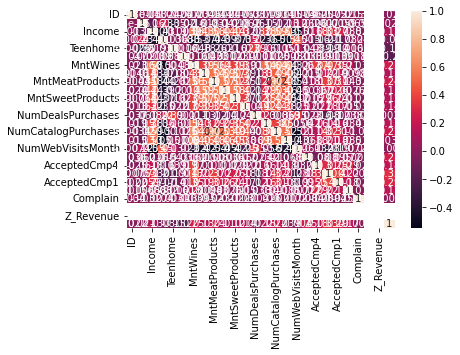

In [289]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Hypothesis Testing

## Menentukan Hipotesis

H0 : Education tidak berpengaruh terhadap Income
H1 : Education berpengaruh signifikan terhadap Incomes

## Mean

In [290]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [291]:
df_graduation = df[df['Education'] == 'Graduation']
df_phd = df[df['Education'] == 'PhD']
df_master = df[df['Education'] == 'Master']
df_2n_cycle = df[df['Education'] == '2n Cycle']
df_basic = df[df['Education'] == 'Basic']

In [292]:
df.groupby(['Education'])['Income'].mean()

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

## P-Value

In [293]:
import scipy.stats as st

In [294]:
anova_result = st.f_oneway(
    df_graduation['Income'],
    df_phd['Income'],
    df_master['Income'],
    df_2n_cycle['Income'],
    df_basic['Income']
)
anova_result

F_onewayResult(statistic=27.977610503959664, pvalue=1.0531133036234708e-22)

In [295]:
pvalue = anova_result.pvalue
pvalue

1.0531133036234708e-22

## Conclusion

In [296]:
if pvalue > 5/100:
  print('Education tidak berpengaruh terhadap Income')
else:
  print('Education berpengaruh signifikan terhadap Incomes')

Education berpengaruh signifikan terhadap Incomes
